## DataSets & DataLoaders

- 데이터 샘플을 처리하기 위한 코드는 지저분하고 유지하기 어렵다.
- 더 나은 가독성과 모듈성을 위해 데이터 세트 코드가 모델 교육 코드가 분리되기를 원한다.
- 파이토치는 `torch.utils.data.DataLoader`와 `torch.utils.data.Dataset` 제공.
- 자신의 데이터뿐만 아니라 미리로드된 데이터 세트를 사용할 수 있다.???
- Dataset : 샘플과 해당 레이블을 저장
- DataLoader : 샘플에 쉽게 엑세스할 수 있도록 Dataset 주위에 반복 가능한 레이블을 매핑

#### Loading a Dataset

- Fashion-MNIST : 60,000 training examples and 10,000 test examples.
- `root` : training or test dataset
- `download` : 다운로드 엽
- `transform` and `target_transform` : feature, label transformations 의 종류

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

In [13]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

### Iterating and Visualizing the Dataset

In [14]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))

<Figure size 576x576 with 0 Axes>

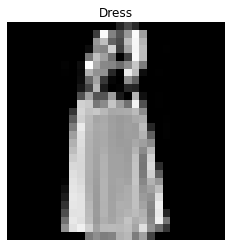

In [15]:
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

#### Creating a Custom Dataset for your files

- Custom Dataset 클래스는 __init__, __len__ 및 __getitem__의 세 가지 함수를 구현해야 합니다
- FashionMNIST 이미지는 디렉토리 img_dir에 저장되고 레이블은 CSV 파일 annotations_file에 별도로 저장됩니다

In [16]:
import os
import pandas as pd
from torchvision.io import read_image

In [17]:
class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform
        
    def __len__(self):
        return len(self.img_labels)
    
    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        
        if self.transform:
            image = self.transform(image)
            
        if self.target_transform(image):
            label = self.target_transform(label)
        return image, label
        
    

In [18]:
import torch
import torch.nn.functional as F

from torch.utils.data import Dataset
from torch.utils.data import DataLoader

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 93],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
        
    def __len__(self):
        return len(self.x_data)
    
    #인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor형태로 리턴
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x, y

In [19]:
dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)
dataloader

In [20]:
model = torch.nn.Linear(3, 1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

In [21]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        # H(x) 계산
        prediction = model(x_train)
        # cost 계산
        cost = F.mse_loss(prediction, y_train)
        
        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))

Epoch    0/20 Batch 1/3 Cost: 51061.468750
Epoch    0/20 Batch 2/3 Cost: 22351.320312
Epoch    0/20 Batch 3/3 Cost: 2455.189209
Epoch    1/20 Batch 1/3 Cost: 1923.758545
Epoch    1/20 Batch 2/3 Cost: 818.785156
Epoch    1/20 Batch 3/3 Cost: 72.386765
Epoch    2/20 Batch 1/3 Cost: 57.786198
Epoch    2/20 Batch 2/3 Cost: 38.187244
Epoch    2/20 Batch 3/3 Cost: 15.460197
Epoch    3/20 Batch 1/3 Cost: 0.380242
Epoch    3/20 Batch 2/3 Cost: 1.309651
Epoch    3/20 Batch 3/3 Cost: 3.614037
Epoch    4/20 Batch 1/3 Cost: 1.029108
Epoch    4/20 Batch 2/3 Cost: 1.099151
Epoch    4/20 Batch 3/3 Cost: 0.212210
Epoch    5/20 Batch 1/3 Cost: 0.628658
Epoch    5/20 Batch 2/3 Cost: 2.030918
Epoch    5/20 Batch 3/3 Cost: 0.310172
Epoch    6/20 Batch 1/3 Cost: 0.094498
Epoch    6/20 Batch 2/3 Cost: 1.935191
Epoch    6/20 Batch 3/3 Cost: 0.219784
Epoch    7/20 Batch 1/3 Cost: 1.082828
Epoch    7/20 Batch 2/3 Cost: 1.010965
Epoch    7/20 Batch 3/3 Cost: 0.172511
Epoch    8/20 Batch 1/3 Cost: 0.187950
Epoch

#### Preparing your data for training with DataLoaders


- 데이터셋은 데이터셋의 피쳐를 검색하고 한 번에 하나의 샘플에 레이블을 지정합니다.
- 모델을 교육하는 동안 우리는 일반적으로 샘플을 "미니배치"로 전달하고, 모델 과적합을 줄이기 위해 매 에포크마다 데이터를 재구성하고, 파이썬의 멀티 프로세싱을 사용하여 데이터 검색 속도를 높이고자 한다.


In [22]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

#### Iterate through the DataLoader

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


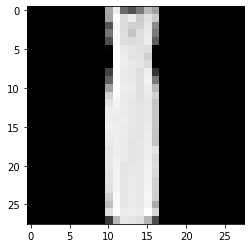

Label: 3


In [25]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")